In [86]:
import pymaster as nmt
import healpy as hp

from cmbml.utils.physics_mask import downgrade_mask

In [87]:
mask_fn = '/data/jim/CMB_Data/Assets/Planck/COM_CMB_IQU-nilc_2048_R3.00_full.fits'
nside = 512

raw_mask = hp.read_map(mask_fn, field=3)  # Field is 3 for the Temperature mask

In [88]:
# resol = hp.nside2resol(nside, arcmin=True)
# if resol > nilc_fwhm_arcmin:
#     # When the FWHM is smaller than the resolution, there's no benefit to using a FWHM at all.
#     raise ValueError('The FWHM is smaller than the resolution.')

In [89]:
resol_deg = hp.nside2resol(nside, arcmin=True) / 60
nilc_fwhm_deg = resol_deg * 3
apodization_scale_deg = nilc_fwhm_deg
print(f"Map resolution: {resol_deg:.2f} deg")
print(f"NILC FWHM: {nilc_fwhm_deg:.2f} deg")
print(f"Apodization Scale: {apodization_scale_deg:.3f} deg")

Map resolution: 0.11 deg
NILC FWHM: 0.34 deg
Apodization Scale: 0.344 deg


In [90]:
print(f"Map resolution: {resol_deg * 60:.2f} arcmin")
print(f"NILC FWHM: {nilc_fwhm_deg * 60:.2f} arcmin")
print(f"Apodization Scale: {apodization_scale_deg * 60:.2f} arcmin")

Map resolution: 6.87 arcmin
NILC FWHM: 20.61 arcmin
Apodization Scale: 20.61 arcmin


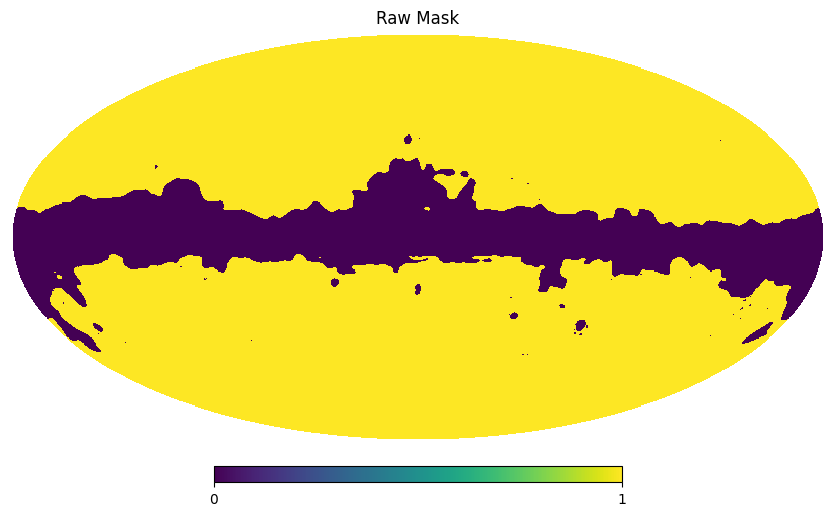

In [91]:
hp.mollview(raw_mask, title='Raw Mask')

In [92]:
mask = downgrade_mask(raw_mask, nside_out=nside, threshold=0.9)  # Threshold is 0.9, per planck 2015 results IX. Diffuse Component Separation: CMB Maps

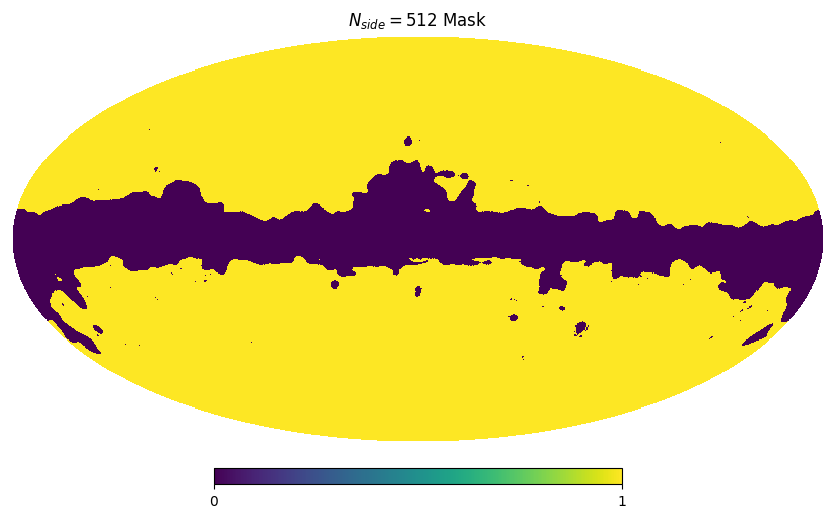

In [93]:
hp.mollview(mask, title='$N_{side}=' + f'{nside}$ Mask')

In [94]:
mask_c1 = nmt.mask_apodization(mask, 3, apotype='C1')
mask_c2 = nmt.mask_apodization(mask, 3, apotype='C2')
mask_smooth = nmt.mask_apodization(mask, 3, apotype='Smooth')

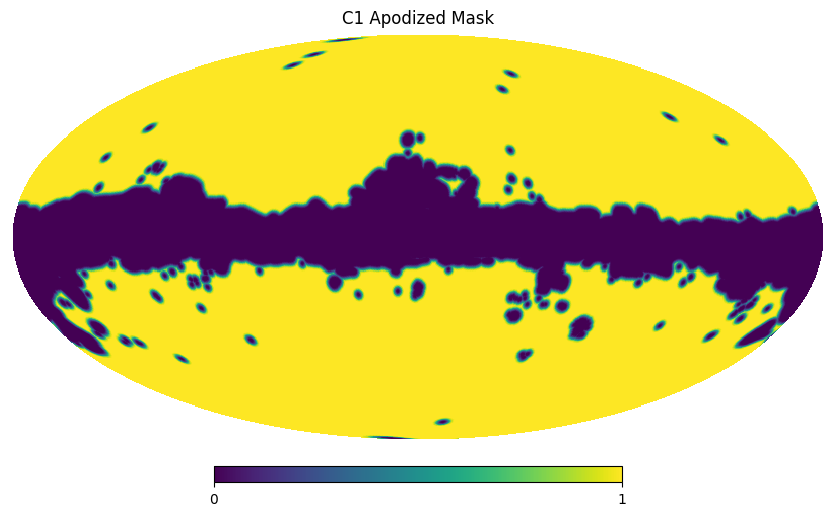

In [95]:
hp.mollview(mask_c1, title='C1 Apodized Mask')

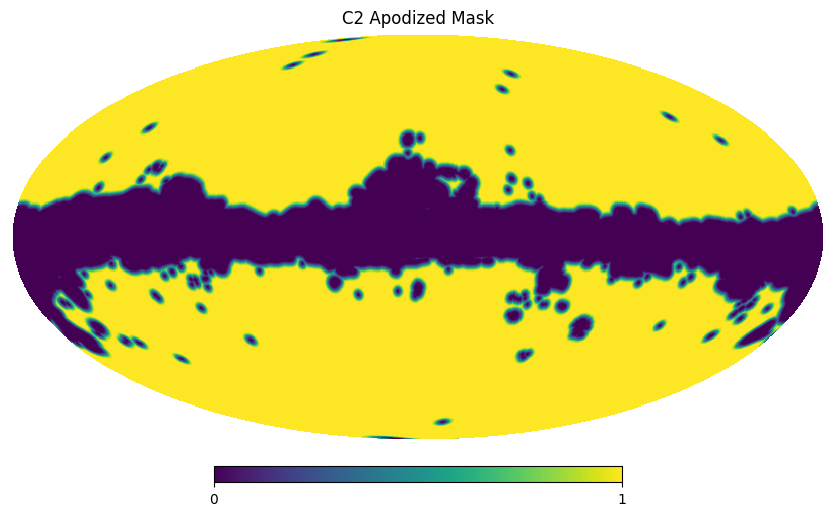

In [96]:
hp.mollview(mask_c2, title='C2 Apodized Mask')

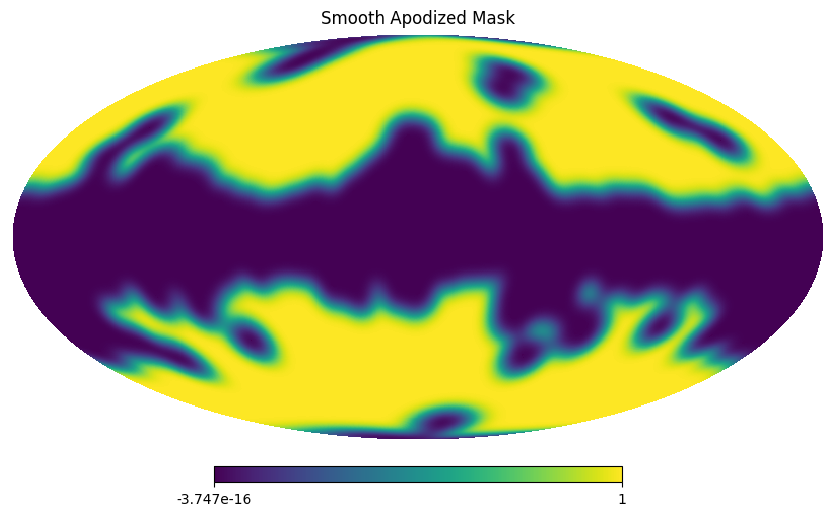

In [97]:
hp.mollview(mask_smooth, title='Smooth Apodized Mask')

In [98]:
hp.write_map(f'mask_c1_{nside}.fits', mask_c1, overwrite=True)
hp.write_map(f'mask_c2_{nside}.fits', mask_c2, overwrite=True)
hp.write_map(f'mask_smooth_{nside}.fits', mask_smooth, overwrite=True)

setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
